In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

/opt/homebrew/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
virtual = gpd.read_file('data_raw/virtual_country')
virtual.head()

,uniq_cnt25,point5_id,pop95,maize,pasture,suit_new,sorghum,allcrops,geometry
0,39,247867.0,0.0002,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-86.00000 82.00000, -86.50000 82.000..."
1,40,247868.0,0.0002,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-85.50000 82.00000, -86.00000 82.000..."
2,40,247869.0,0.0003,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-85.00000 82.00000, -85.50000 82.000..."
3,40,247870.0,0.0003,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-84.50000 82.00000, -85.00000 82.000..."
4,40,247871.0,0.0003,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-84.00000 82.00000, -84.50000 82.000..."


In [3]:
greg = gpd.read_file('greg')
greg.head()

,FIPS_CNTRY,GROUP1,GROUP2,GROUP3,G1ID,G2ID,G3ID,G1SHORTNAM,G2SHORTNAM,G3SHORTNAM,G1LONGNAM,G2LONGNAM,G3LONGNAM,FeatureID,AREA,COW,geometry
0,AA,12,0,0,312,0,0,Curaçao Islanders,None,None,Curaçao Islanders,None,None,0,2.007795e+08,0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,AC,16,0,0,354,0,0,English-speaking population of the Lesser Anti...,None,None,English-speaking population of the Lesser Anti...,None,None,1,5.398570e+08,58,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,AF,33,53,0,117,202,0,Baloch,Brahui,None,Baloch (Baluchis),Brahui,None,2,1.189781e+10,700,"POLYGON ((64.03937 30.02453, 64.03937 30.11267..."
3,AF,24,34,0,898,12,0,Persians,Afghans,None,Persians,"Afghans (Pushtuns, Pathans)",None,3,1.653610e+09,700,"POLYGON ((61.75456 30.78628, 61.75833 30.79028..."
4,AF,34,41,0,12,1051,0,Afghans,Tajiks,None,"Afghans (Pushtuns, Pathans)",Tajiks (Tadzhiks),None,4,3.251011e+09,700,"POLYGON ((61.62285 31.39536, 61.64841 31.46713..."


In [4]:
virtual.crs, greg.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<AxesSubplot:>

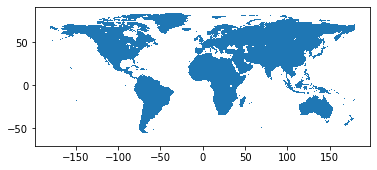

In [5]:
virtual.plot()

<AxesSubplot:>

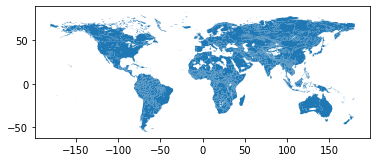

In [6]:
greg.plot()

In [7]:
melted = pd.melt(greg, id_vars = ['geometry'], value_vars = ['G1SHORTNAM', 'G2SHORTNAM', 'G3SHORTNAM'], value_name = 'SHORTNAM')
ethnicGroups = melted[melted['SHORTNAM'].notna()].drop('variable', axis = 1).dissolve(by = 'SHORTNAM', aggfunc = 'first', as_index = False)
ethnicGroups

,SHORTNAM,geometry
0,Abazinians,"MULTIPOLYGON (((41.83519 44.08370, 41.86445 44..."
1,Abkhaz,"MULTIPOLYGON (((41.73878 42.62086, 41.71329 42..."
2,Achaguas,"MULTIPOLYGON (((-74.02123 2.16973, -73.98634 2..."
3,Achang,"POLYGON ((97.84312 24.33767, 97.84467 24.36087..."
4,Achinese,"MULTIPOLYGON (((97.81446 2.77691, 97.86672 2.7..."
...,...,...
923,Zagawa,"MULTIPOLYGON (((25.88538 14.53904, 25.83321 14..."
924,Zakhchins,"POLYGON ((91.54557 47.36713, 91.54557 47.43751..."
925,Zapotecs,"POLYGON ((-94.96082 16.37316, -95.03084 16.322..."
926,Zoque,"MULTIPOLYGON (((-93.18895 16.87464, -93.13737 ..."


In [8]:
joined = gpd.sjoin(virtual, ethnicGroups, predicate = 'intersects', how = 'left')

<AxesSubplot:xlabel='SHORTNAM', ylabel='Count'>

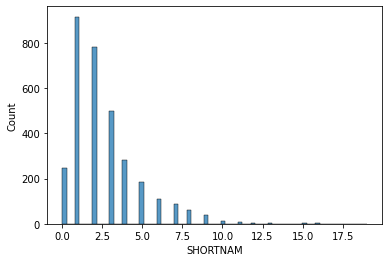

In [9]:
sns.histplot(x = joined.groupby('uniq_cnt25')['SHORTNAM'].nunique().sort_values())

In [10]:
joined.groupby('uniq_cnt25')['SHORTNAM'].nunique().to_csv('greg.csv')